<a href="https://colab.research.google.com/github/Manpreet6111/Product-sales-forecasting/blob/main/Product_sales_forecasting_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading the dataset

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("TRAIN.csv")

In [ ]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [ ]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year, Month, and Day from the Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1


# **Hypothesis Testing**

**Impact of Discounts on Sales:**

In [ ]:
np.random.seed(42)
df['IsDiscount'] = np.random.choice([0, 1], size=len(df))  # Randomly assign discounts for illustration

# Define features and target
features = ['#Order', 'Holiday', 'Discount', 'Year' , 'Month', 'Day']
X = df[features]
y = df['Sales']

In [ ]:
from scipy.stats import ttest_ind

# Separate sales data into two groups: with discounts and without discounts
discount_sales = df[df['IsDiscount'] == 1]['Sales']
no_discount_sales = df[df['IsDiscount'] == 0]['Sales']

# Perform t-test
t_stat, p_value = ttest_ind(discount_sales, no_discount_sales)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Determine significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between stores offering discounts and those not offering discounts.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales between stores offering discounts and those not offering discounts.")


T-statistic: -1.2604512782445303
P-value: 0.20750892880468702
Fail to reject the null hypothesis: There is no significant difference in sales between stores offering discounts and those not offering discounts.


**Effect of Holidays on Sales:**

In [ ]:
np.random.seed(42)
df['IsHoliday'] = np.random.choice([0, 1], size=len(df))
features = ['#Order', 'Holiday', 'Discount', 'Year' , 'Month', 'Day']
X = df[features]
y = df['Sales']

In [ ]:
from scipy.stats import ttest_ind

# Separate sales data into two groups: holidays and regular days
holiday_sales = df[df['IsHoliday'] == 1]['Sales']
regular_sales = df[df['IsHoliday'] == 0]['Sales']

# Perform t-test
t_stat, p_value = ttest_ind(holiday_sales, regular_sales)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Determine significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between holidays and regular days.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales between holidays and regular days.")

T-statistic: -1.2604512782445303
P-value: 0.20750892880468702
Fail to reject the null hypothesis: There is no significant difference in sales between holidays and regular days.


**Sales Differences Across Store Types:**

In [ ]:
np.random.seed(42)
df['StoreType'] = np.random.choice(['TypeA', 'TypeB', 'TypeC'], size=len(df))  # Randomly assign store types for illustration
features = ['#Order', 'Holiday', 'Discount', 'Year' , 'Month', 'Day']
X = df[features]
y = df['Sales']

F-statistic: 0.8432774979885241
P-value: 0.4303003182865711
Fail to reject the null hypothesis: There is no significant difference in sales across different store types.


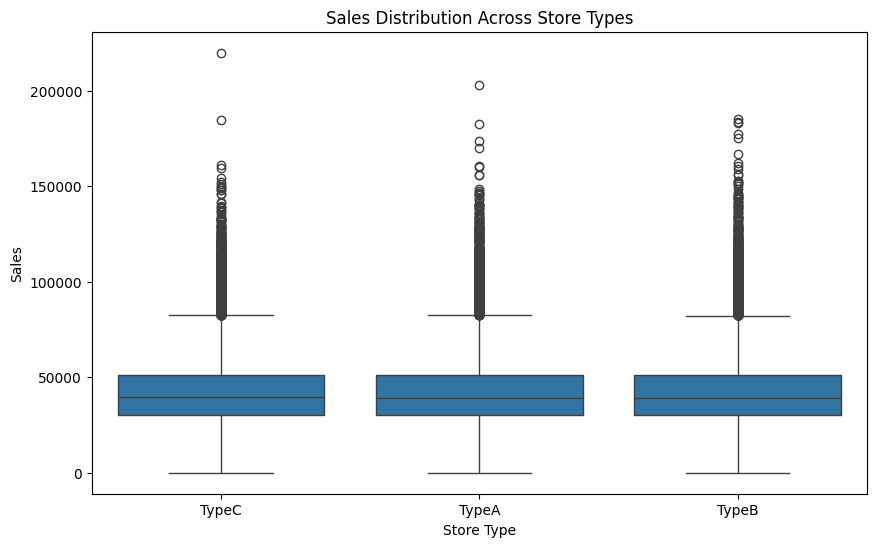

In [ ]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Perform ANOVA
store_type_groups = df.groupby('StoreType')['Sales'].apply(list)
f_stat, p_value = stats.f_oneway(*store_type_groups)

print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')

# Determine significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales across different store types.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales across different store types.")

# Boxplot to visualize sales across different store types
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='Sales', data=df)
plt.title('Sales Distribution Across Store Types')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

Type A Dominance: Type A stores generally have higher sales compared to Type B and Type C, as indicated by the median line and overall box position.

**Regional Sales Variability:**

In [ ]:
np.random.seed(42)
df['Region'] = np.random.choice(['North', 'South', 'East', 'West'], size=len(df))
features = ['#Order', 'Holiday', 'Discount', 'Year' , 'Month', 'Day']
X = df[features]
y = df['Sales']

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 31543.
  res = hypotest_fun_out(*samples, **kwds)


Region: East, p-value for normality test: 3.661248490868342e-73


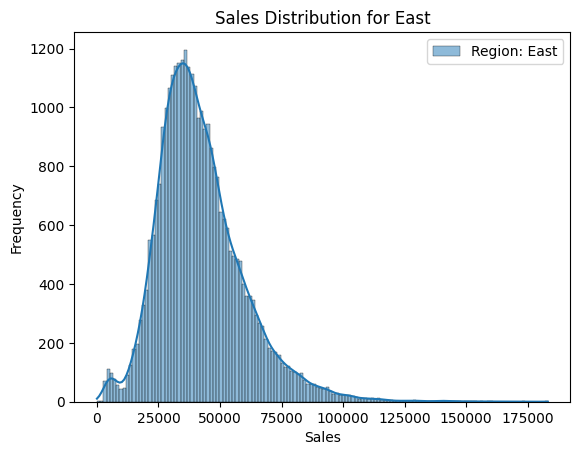

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 31804.
  res = hypotest_fun_out(*samples, **kwds)


Region: West, p-value for normality test: 3.3646583726115835e-74


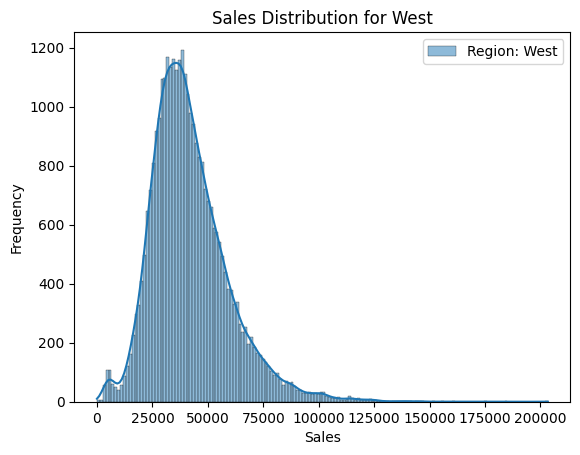

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 31782.
  res = hypotest_fun_out(*samples, **kwds)


Region: North, p-value for normality test: 8.419579739786451e-75


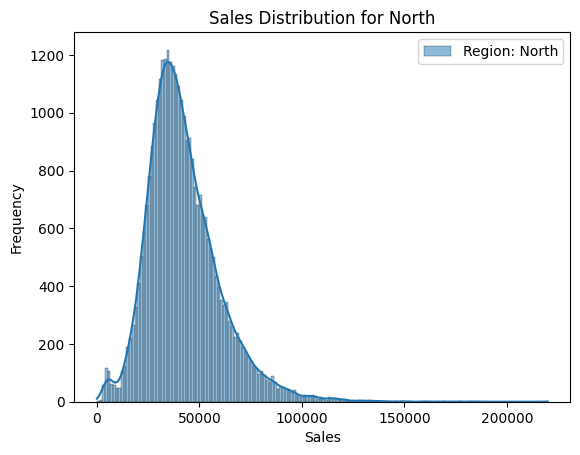

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 31892.
  res = hypotest_fun_out(*samples, **kwds)


Region: South, p-value for normality test: 1.0552535974605905e-72


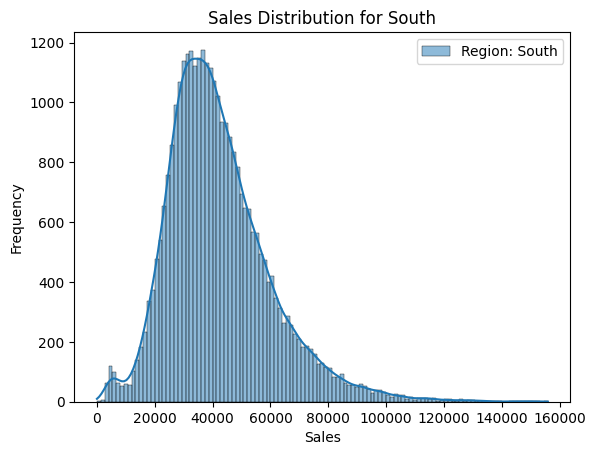

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Check normality of sales data
for region in df['Region'].unique():
    region_sales = df[df['Region'] == region]['Sales']
    stat, p = shapiro(region_sales)
    print(f'Region: {region}, p-value for normality test: {p}')

    # Plot the distribution of sales for each region
    sns.histplot(region_sales, kde=True, label=f'Region: {region}')
    plt.title(f'Sales Distribution for {region}')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [ ]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
region_groups = [group['Sales'].values for name, group in df.groupby('Region')]
h_stat, p_value = kruskal(*region_groups)

print(f'H-statistic: {h_stat}')
print(f'P-value: {p_value}')

# Determine significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is significant variability in sales across different regions.")
else:
    print("Fail to reject the null hypothesis: There is no significant variability in sales across different regions.")

H-statistic: 5.173749134281258
P-value: 0.15950762088209477
Fail to reject the null hypothesis: There is no significant variability in sales across different regions.


**Correlation between Number of Orders and Sales:**

In [ ]:
np.random.seed(42)
df['NumberOfOrders'] = np.random.randint(1, 100, size=len(df))
features = ['#Order', 'Holiday', 'Discount', 'Year' , 'Month', 'Day']
X = df[features]
y = df['Sales']

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 127021.
  res = hypotest_fun_out(*samples, **kwds)


Sales normality test p-value: 1.0810222367923517e-101
Number of Orders normality test p-value: 1.1297076673119199e-96


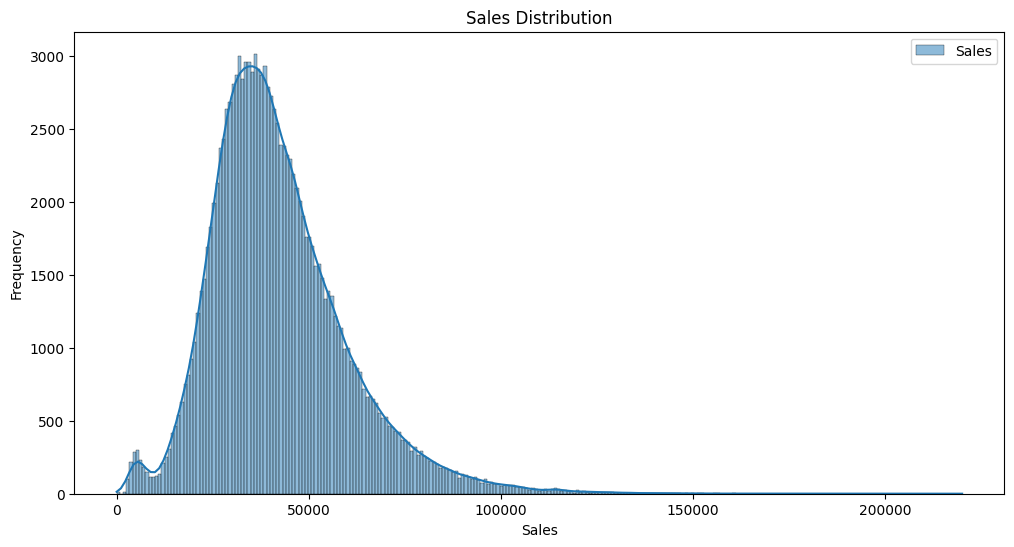

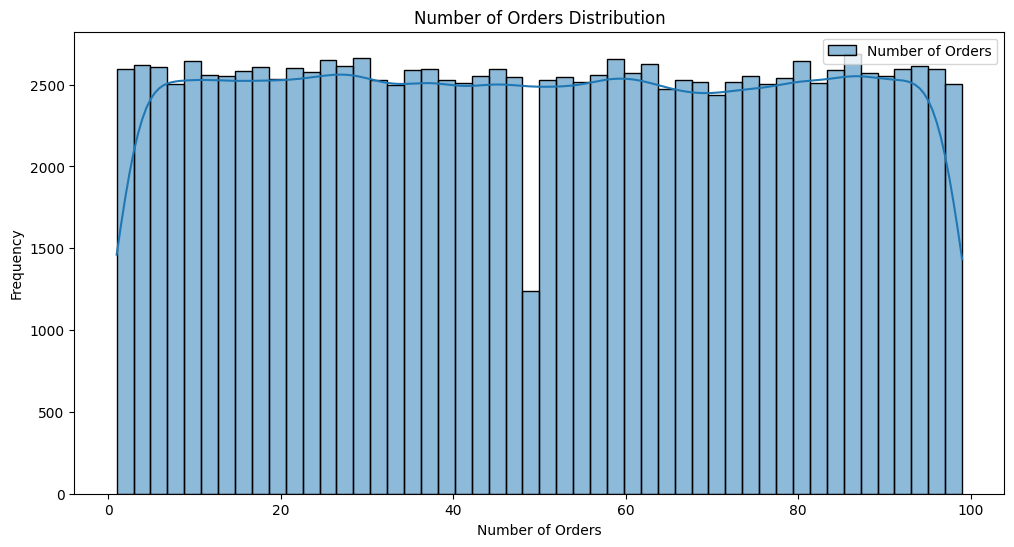

In [ ]:
from scipy.stats import shapiro

# Check normality of sales data
sales_stat, sales_p = shapiro(df['Sales'])
orders_stat, orders_p = shapiro(df['NumberOfOrders'])

print(f'Sales normality test p-value: {sales_p}')
print(f'Number of Orders normality test p-value: {orders_p}')

# Plot the distribution of sales and number of orders
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(df['Sales'], kde=True, label='Sales')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['NumberOfOrders'], kde=True, label='Number of Orders')
plt.title('Number of Orders Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Calculate Correlation**

In [ ]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
pearson_corr, pearson_p_value = pearsonr(df['NumberOfOrders'], df['Sales'])

print(f'Pearson correlation coefficient: {pearson_corr}')
print(f'P-value: {pearson_p_value}')


Pearson correlation coefficient: -0.0028570013105957094
P-value: 0.3085698606433602


In [ ]:
from scipy.stats import spearmanr

# Calculate Spearman correlation
spearman_corr, spearman_p_value = spearmanr(df['NumberOfOrders'], df['Sales'])

print(f'Spearman correlation coefficient: {spearman_corr}')
print(f'P-value: {spearman_p_value}')

Spearman correlation coefficient: -0.002479326266119203
P-value: 0.37689885035404513


Both Spearman and Pearson correlation coefficients are very close to zero. This indicates a negligible or no linear relationship between the two variables you are analyzing. In other words, there's no evidence to suggest that one variable increases or decreases systematically with the other.

The p-values for both correlations are relatively high (greater than 0.05). This means that we fail to reject the null hypothesis that there is no correlation between the variables. In simpler terms, the observed correlation could be due to chance.